# Analyse des résultats d'un modèle méthode 2

## setup

### Import des fichiers

In [1]:
#Temps et fichiers
import os
import warnings
import time
from datetime import timedelta

#Manipulation de données
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from functools import partial


#Modélisation
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import PoissonRegressor, GammaRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_tweedie_deviance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, auc

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV# the keys can be accessed with final_pipeline.get_params().keys()
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

#Text
import re

#Evaluation
from sklearn.metrics import f1_score, confusion_matrix


#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Tracking d'expérience
import mlflow
import mlflow.sklearn

### Utilisation du code du projet packagé

In [2]:
#Cette cellule permet d'appeler la version packagée du projet et d'en assurer le reload avant appel des fonctions
%load_ext autoreload
%autoreload 2

In [3]:
random_state=42

### Configuration de l'experiment MLFlow

In [4]:
mlflow.tracking.get_tracking_uri()

'/mnt/experiments'

## Chargement des données

In [81]:
# On Importe les données

#df
df_merged =pd.read_parquet('/mnt/data/interim/df_merged.gzip')
df_train=pd.read_parquet('/mnt/data/interim/df_train.gzip')
df_val=pd.read_parquet('/mnt/data/interim/df_val.gzip')

#X
X_train=pd.read_parquet('/mnt/data/interim/X_train.gzip')
X_val=pd.read_parquet('/mnt/data/interim/X_val.gzip')
X_test=pd.read_parquet('/mnt/data/interim/X_test.gzip')

#y
y_train=pd.read_parquet('/mnt/data/interim/y_train.gzip')
y_val=pd.read_parquet('/mnt/data/interim/y_val.gzip')

## Analyse

### Chargement des modèles

Chacune des cellules ci-dessous correspond à une combinaison de modèle
- en évaluer une
- puis exécuter toutes les cellules de la section suivante

In [11]:
freq_model = '/mnt/experiments/3/ded262b593324ee68daa8884ac151f0b/artifacts/Essai_sans_imbalanced_BRC'
chg_model= '/mnt/experiments/4/e23a505fc29e4bba96b8514f3bdd9fc4/artifacts/Essai_RF'

# Load model as a PyFuncModel.
freq_model = mlflow.pyfunc.load_model(freq_model)
chg_model = mlflow.pyfunc.load_model(chg_model)

In [82]:
freq_model = '/mnt/experiments/3/ad1edb56238a4b2cb5740da299430d9e/artifacts/Classif2'
chg_model= '/mnt/experiments/4/e68c4d8a51c7456fb81664a90844cdeb/artifacts/Essai_RF2'

# Load model as a PyFuncModel.
freq_model = mlflow.pyfunc.load_model(freq_model)
chg_model = mlflow.pyfunc.load_model(chg_model)

In [104]:
freq_model = '/mnt/experiments/3/e17df8c637f34c738b4a6aee1f73b2d6/artifacts/Classif3'
chg_model= '/mnt/experiments/4/403aea18a58f4fcd8170da26ebe9361b/artifacts/Essai_RF3'

# Load model as a PyFuncModel.
freq_model = mlflow.pyfunc.load_model(freq_model)
chg_model = mlflow.pyfunc.load_model(chg_model)

### Exécuter toutes les cellules à partir d'ici

In [105]:
from hackathondsa_groupe4.viz.graphs import *

In [107]:
S_cible=28.392414777526447

In [108]:
#X_train_mod=X_train.drop('Isin',axis=1)
data=df_val
pred = freq_model.predict(X_val)*chg_model.predict(X_val)
pred = pred*S_cible/pred.mean()
field='COUT'

#### Temporelle 

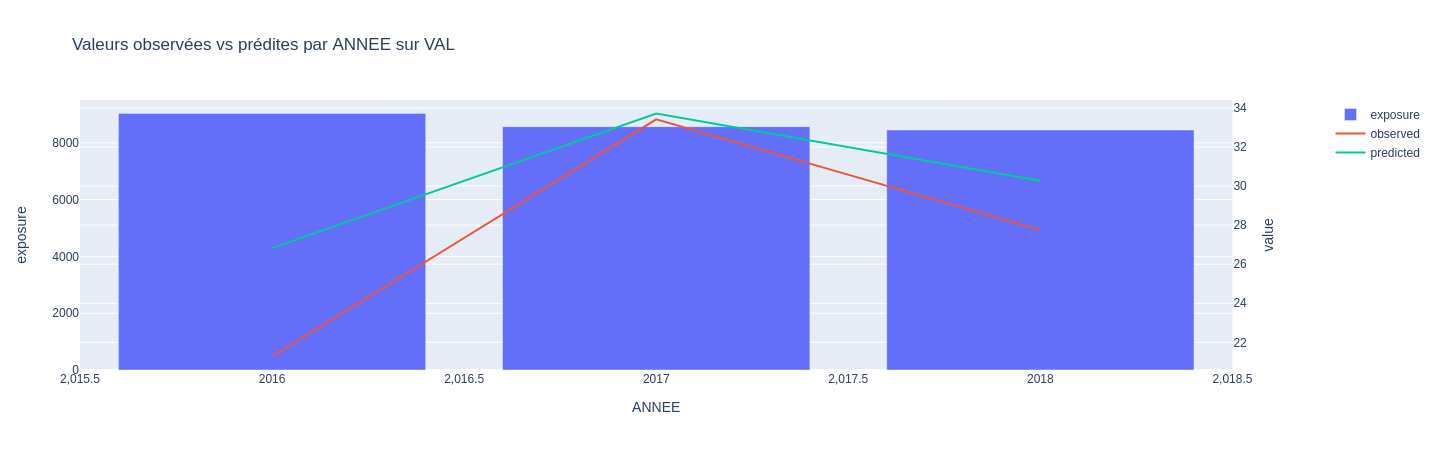

,ANNEE,EXPO,observed,predicted
0,2016,9033.399533,21.276567,26.825322
1,2017,8569.811049,33.411337,33.713545
2,2018,8453.005073,27.742710,30.268988


In [111]:
plot_obs_pred_3(
    df=data,
    feature="ANNEE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### FORMULE 

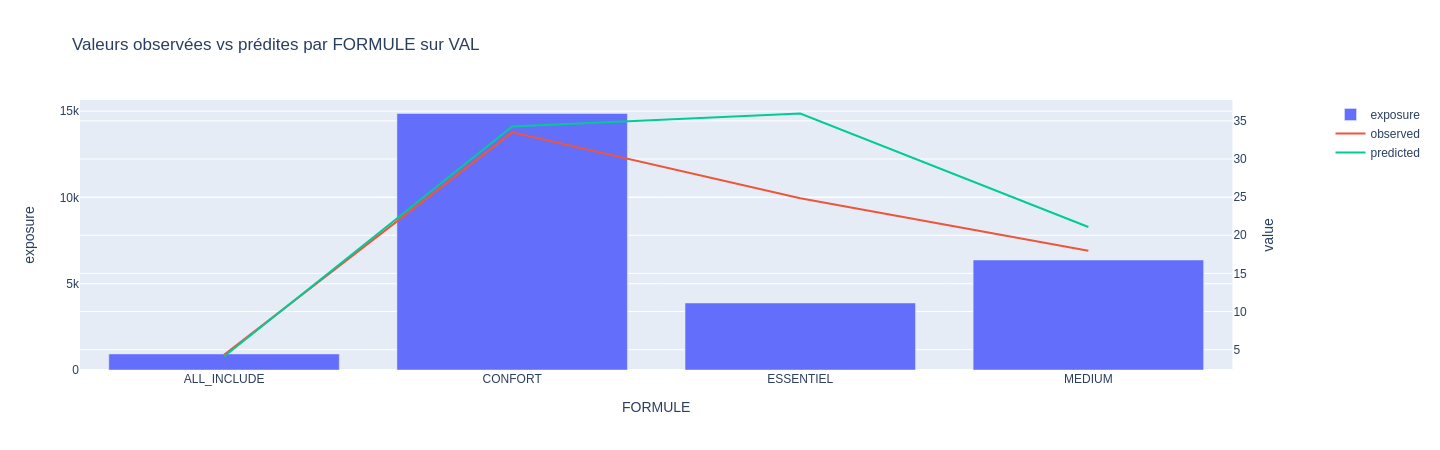

,FORMULE,EXPO,observed,predicted
0,ALL_INCLUDE,929.451654,4.313754,4.102159
1,CONFORT,14866.676661,33.487060,34.250609
2,ESSENTIEL,3885.166339,24.851962,35.963082
3,MEDIUM,6374.921000,17.981887,21.079228


In [112]:
plot_obs_pred_3(
    df=data,
    feature="FORMULE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### TYPE_RESIDENCE

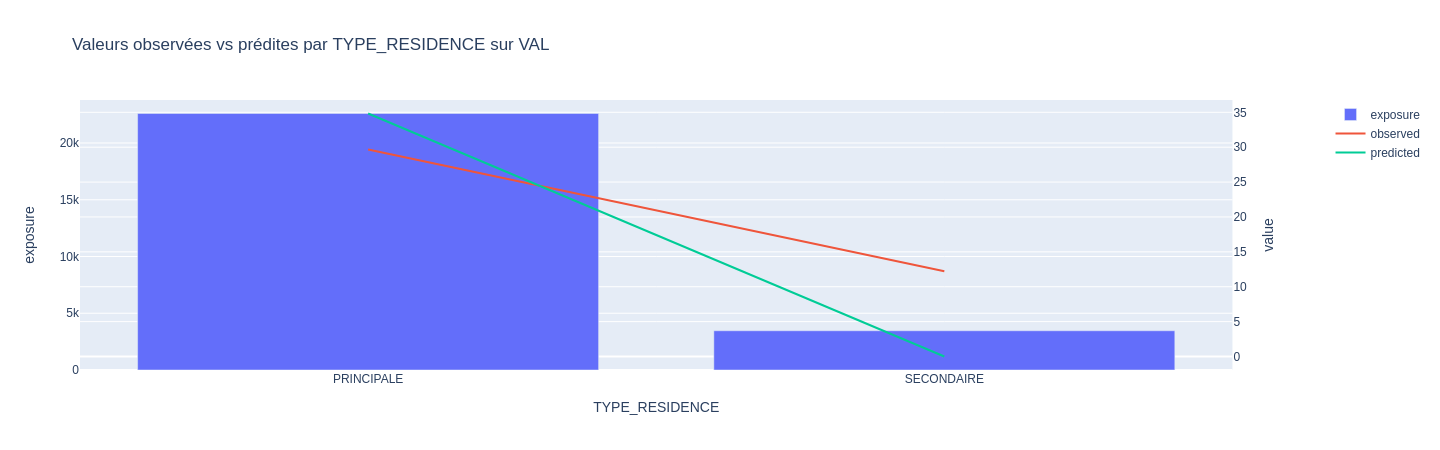

,TYPE_RESIDENCE,EXPO,observed,predicted
0,PRINCIPALE,22599.231705,29.682254,34.828904
1,SECONDAIRE,3456.983950,12.219233,0.000000


In [113]:
plot_obs_pred_3(
    df=data,
    feature="TYPE_RESIDENCE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### TYPE_HABITATION 

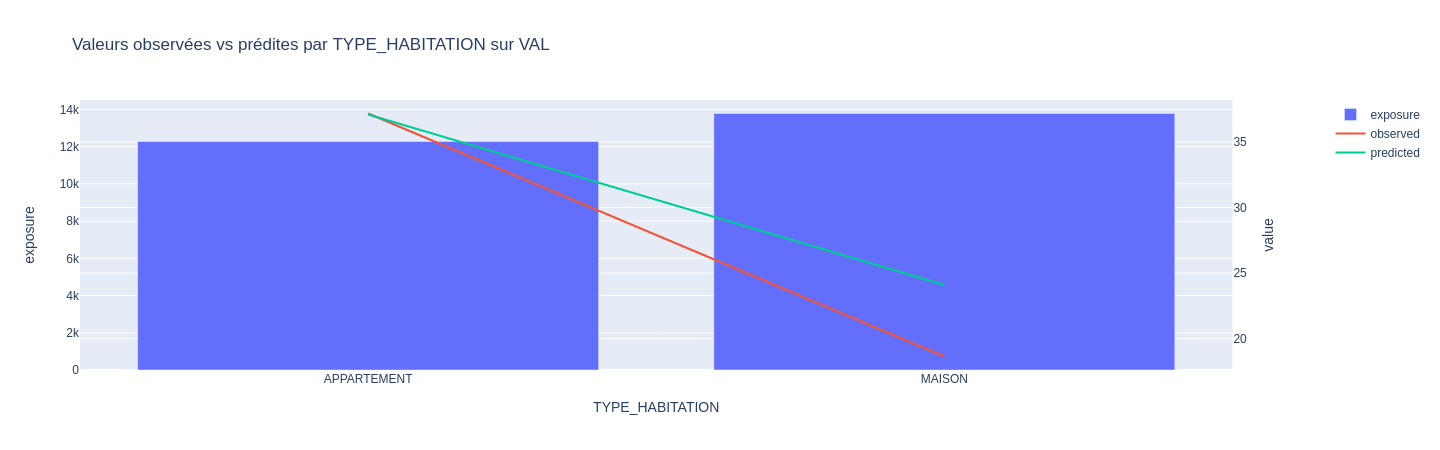

,TYPE_HABITATION,EXPO,observed,predicted
0,APPARTEMENT,12275.851011,37.164132,37.083550
1,MAISON,13780.364643,18.636408,24.083131


In [114]:
plot_obs_pred_3(
    df=data,
    feature="TYPE_HABITATION",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NB_PIECES

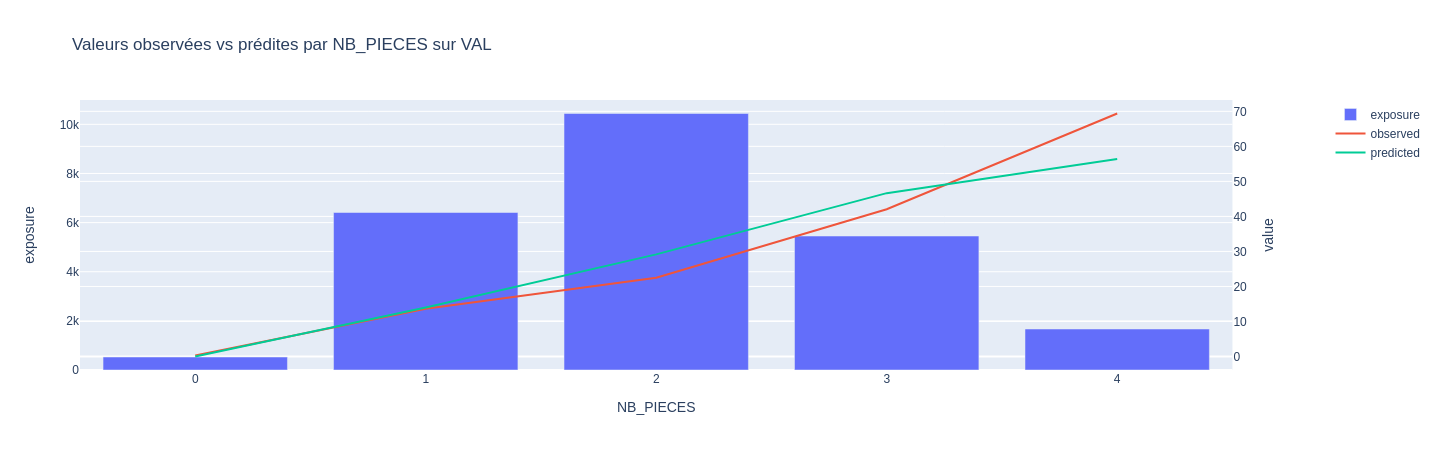

,NB_PIECES,EXPO,observed,predicted
0,0.0,526.735480,0.293468,0.000000
1,1.0,6410.490620,13.641303,13.971869
2,2.0,10440.913188,22.482999,29.165987
3,3.0,5453.390545,42.059333,46.643413
4,4.0,1668.409145,69.386203,56.392818


In [115]:
plot_obs_pred_3(
    df=data,
    feature="NB_PIECES",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### SITUATION_JURIDIQUE 

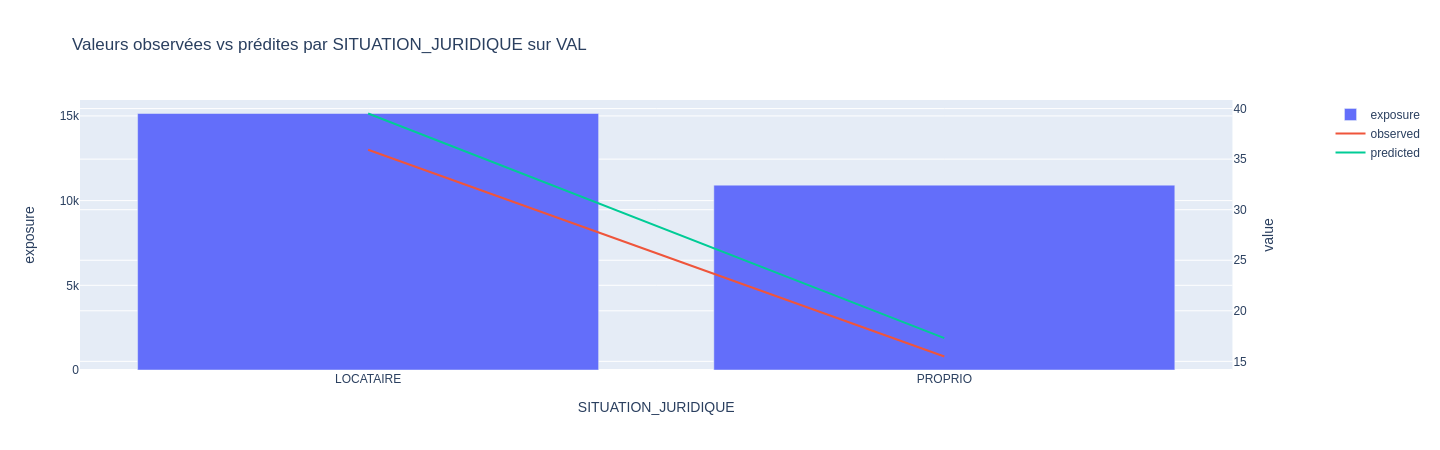

,SITUATION_JURIDIQUE,EXPO,observed,predicted
0,LOCATAIRE,15142.369230,35.931834,39.514292
1,PROPRIO,10913.846424,15.479853,17.296054


In [116]:
plot_obs_pred_3(
    df=data,
    feature="SITUATION_JURIDIQUE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NIVEAU_JURIDIQUE 

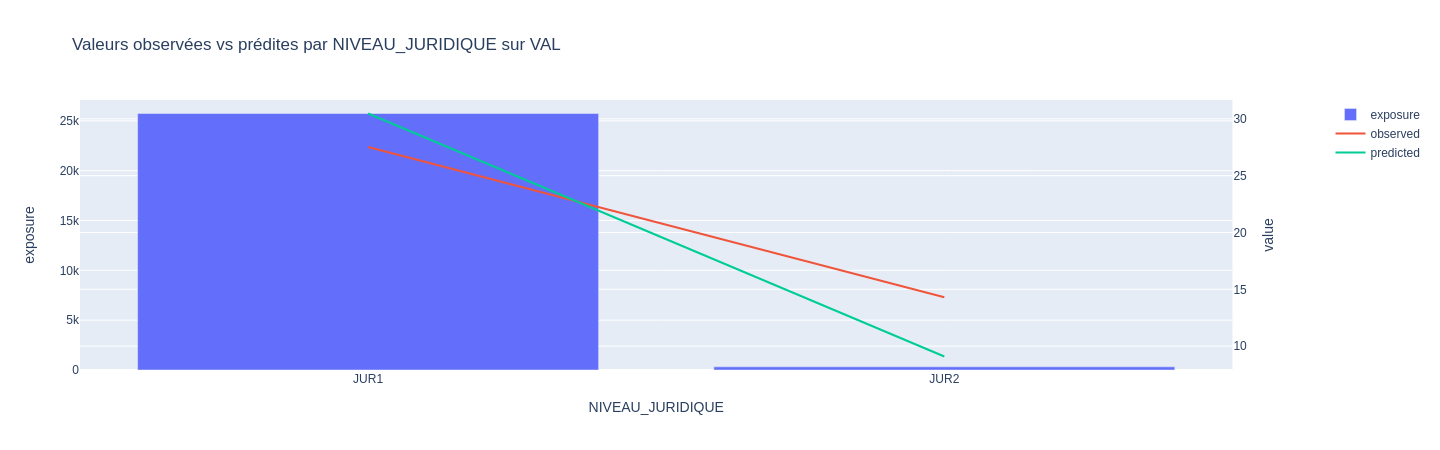

,NIVEAU_JURIDIQUE,EXPO,observed,predicted
0,JUR1,25737.055600,27.527362,30.469928
1,JUR2,319.160055,14.301928,9.087078


In [117]:
plot_obs_pred_3(
    df=data,
    feature="NIVEAU_JURIDIQUE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### VALEUR_DES_BIENS 

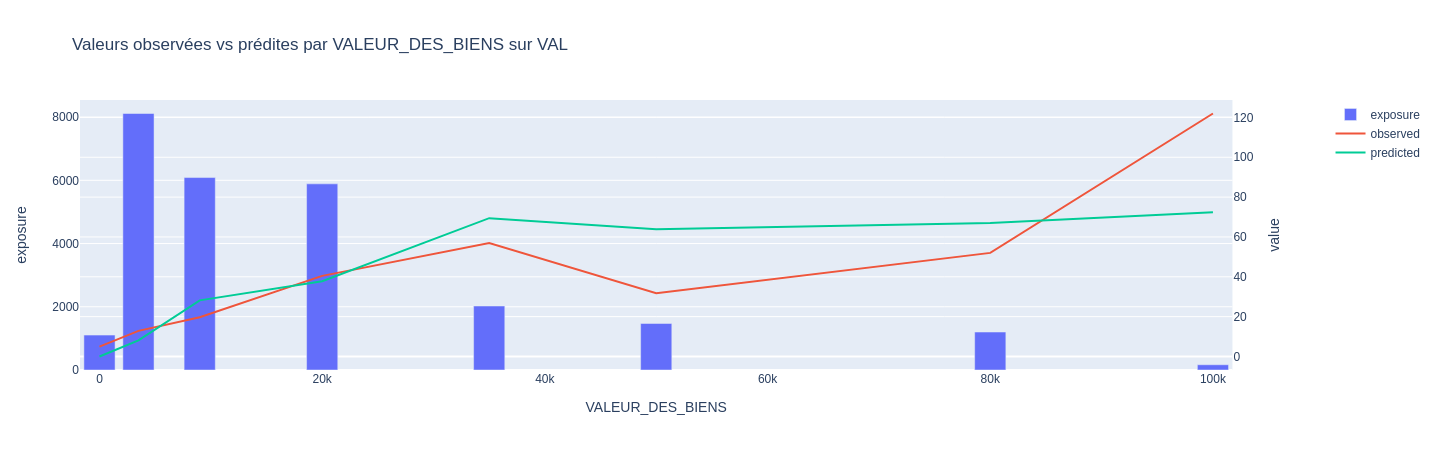

,VALEUR_DES_BIENS,EXPO,observed,predicted
0,0.0,1103.973847,4.960327,0.000000
1,3500.0,8113.498152,12.855105,8.118830
2,9000.0,6087.185005,19.737227,28.176752
3,20000.0,5888.215695,40.464774,37.802136
4,35000.0,2024.120656,56.977505,69.435388
5,50000.0,1472.015346,31.809123,63.907874
6,80000.0,1201.353541,52.000179,67.010243
7,100000.0,165.853413,121.968939,72.402197


In [118]:
plot_obs_pred_3(
    df=data,
    feature="VALEUR_DES_BIENS",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### OBJETS_DE_VALEUR

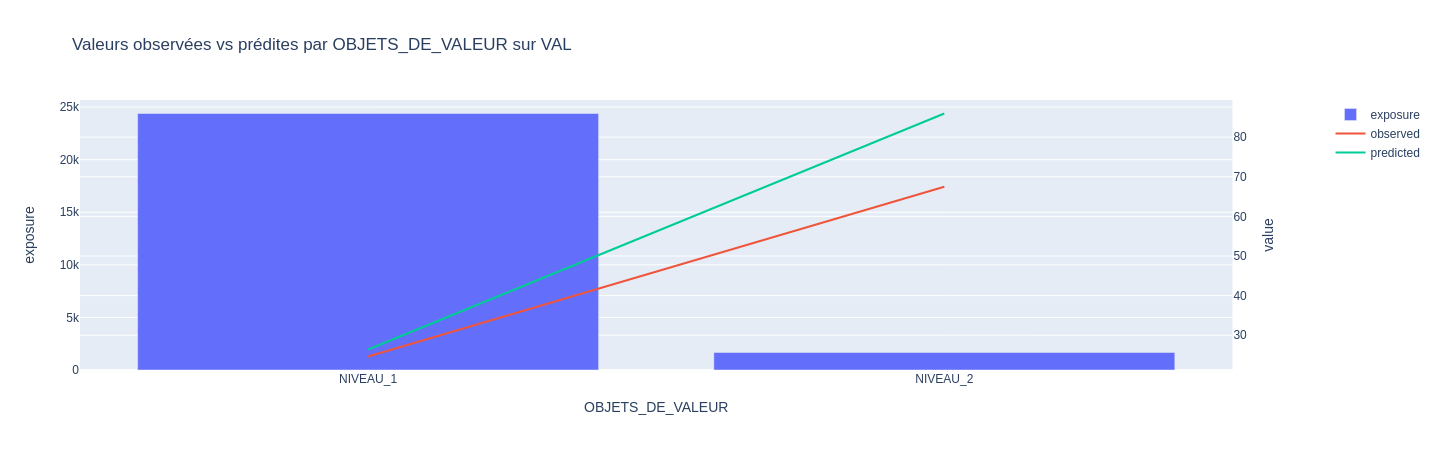

,OBJETS_DE_VALEUR,EXPO,observed,predicted
0,NIVEAU_1,24389.914378,24.626339,26.398661
1,NIVEAU_2,1666.301277,67.456909,85.966078


In [119]:
plot_obs_pred_3(
    df=data,
    feature="OBJETS_DE_VALEUR",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### ZONIER

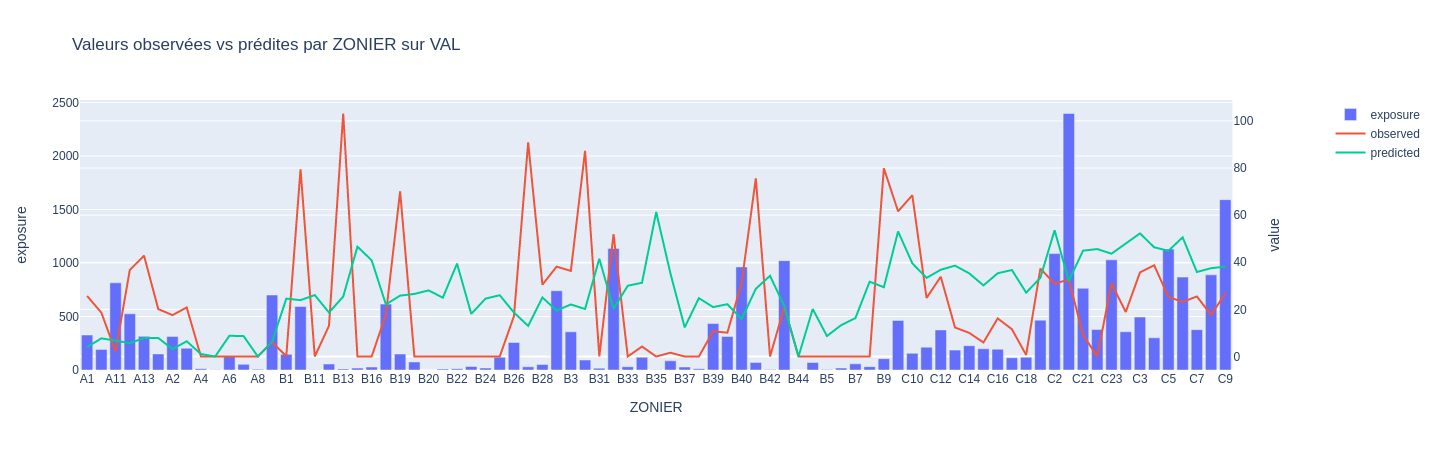

,ZONIER,EXPO,observed,predicted
0,A1,326.832549,25.693647,3.996972
1,A10,192.483395,18.624100,7.712032
2,A11,814.663355,2.088318,6.731672
3,A12,524.781563,36.723184,5.672251
4,A13,314.304108,42.814640,7.843211
...,...,...,...,...
76,C5,1129.940704,25.327487,44.859592
77,C6,868.260377,23.155653,50.589243
78,C7,376.872698,25.487738,35.877383
79,C8,889.073589,17.663402,37.490901


In [120]:
plot_obs_pred_3(
    df=data,
    feature="ZONIER",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE1_AN1 

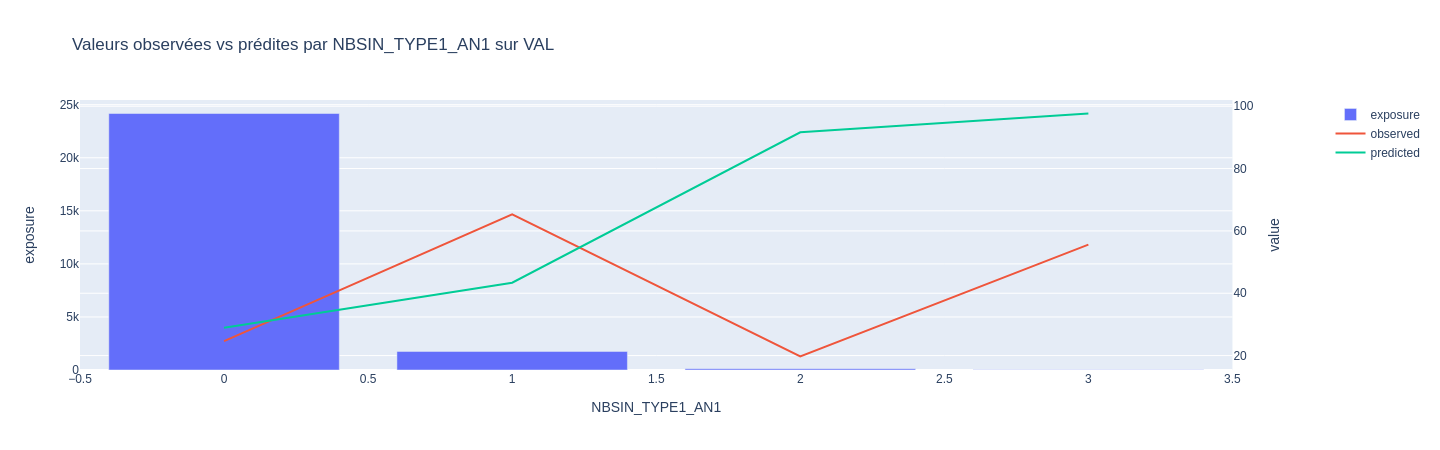

,NBSIN_TYPE1_AN1,EXPO,observed,predicted
0,0,24170.775967,24.638806,28.903807
1,1,1749.444287,65.284293,43.393175
2,2,119.070720,19.709435,91.644240
3,3,16.924680,55.583327,97.664863


In [121]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE1_AN1",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE1_AN3 

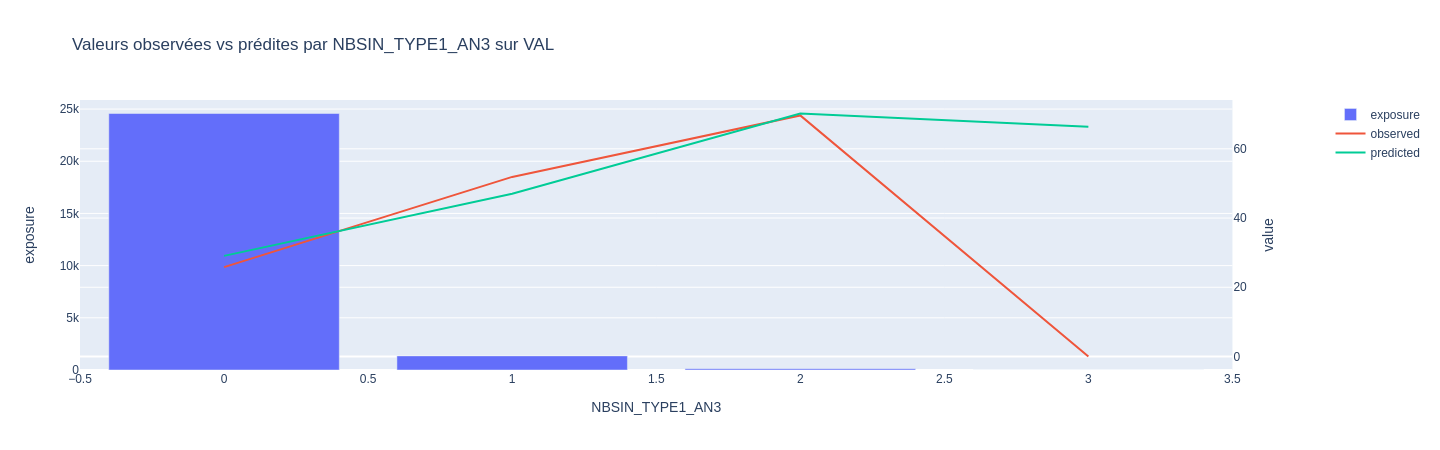

,NBSIN_TYPE1_AN3,EXPO,observed,predicted
0,0,24574.453613,25.817028,29.073720
1,1,1352.560318,51.887456,47.019633
2,2,120.867478,69.642989,70.204843
3,3,8.334246,0.000000,66.391350


In [122]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE1_AN3",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE2_AN1 

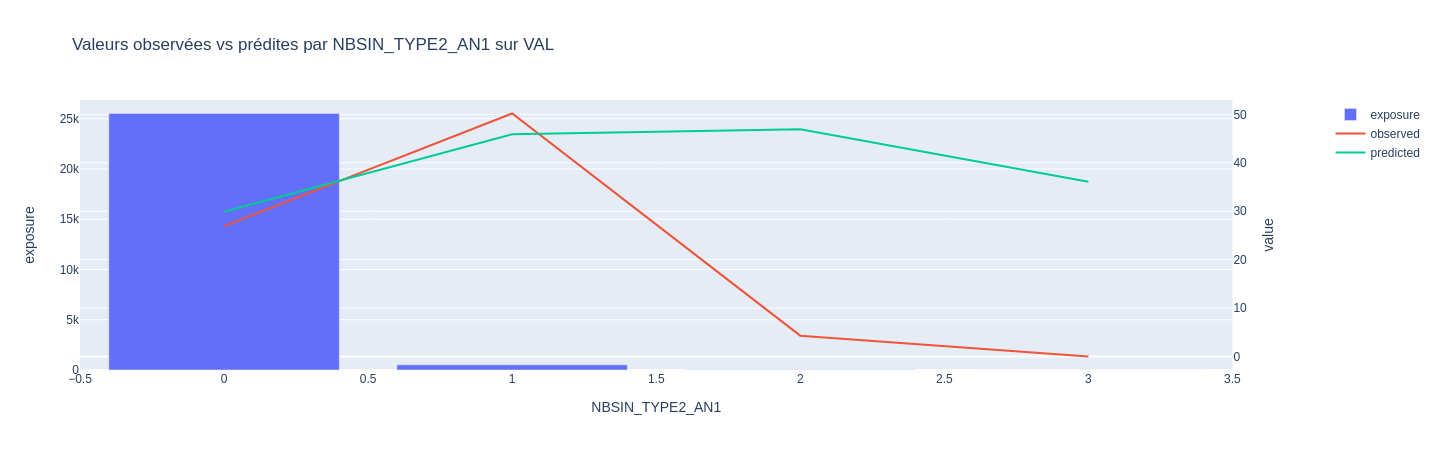

,NBSIN_TYPE2_AN1,EXPO,observed,predicted
0,0,25514.551060,26.935880,29.874452
1,1,511.354288,50.179433,45.905164
2,2,28.214417,4.305600,46.920121
3,3,2.095890,0.000000,36.073347


In [123]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE2_AN1",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE2_AN2 

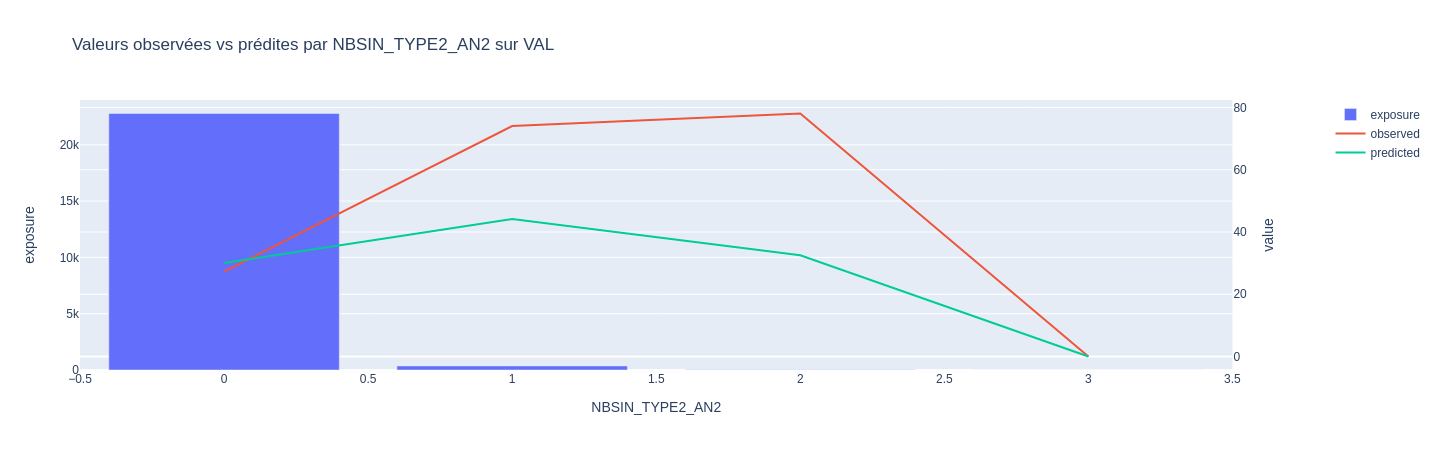

,NBSIN_TYPE2_AN2,EXPO,observed,predicted
0,0.0,22778.756235,27.259672,30.030008
1,1.0,361.242223,74.041151,44.142202
2,2.0,14.301369,78.081335,32.519190
3,3.0,2.000000,0.000000,0.000000


In [124]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE2_AN2",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE2_AN3 

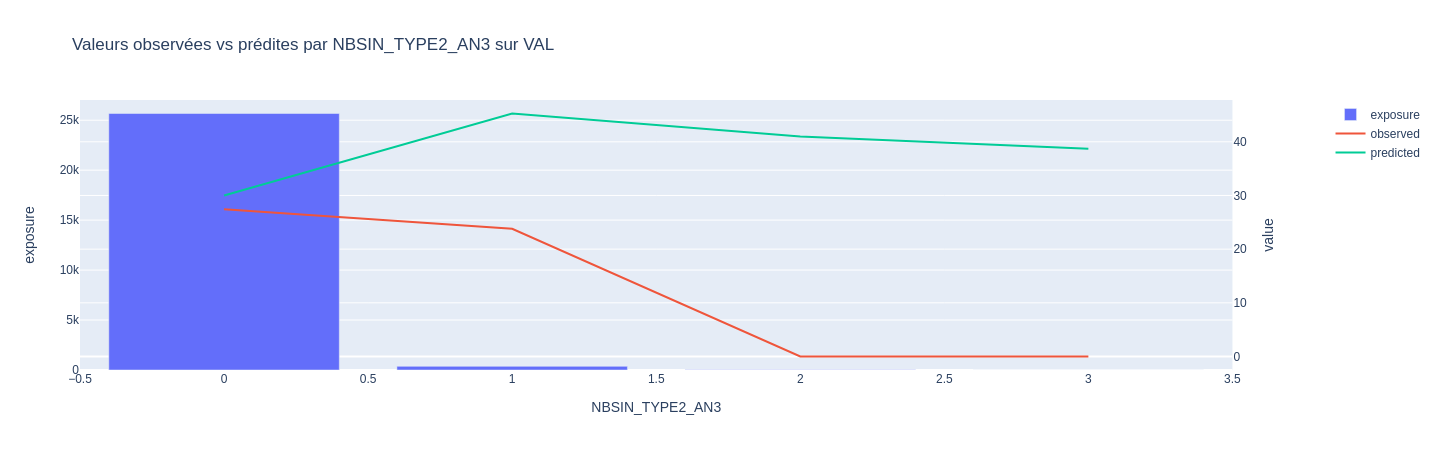

,NBSIN_TYPE2_AN3,EXPO,observed,predicted
0,0,25671.369740,27.438689,29.985792
1,1,363.665093,23.783173,45.273647
2,2,20.180821,0.000000,40.977415
3,3,1.000000,0.000000,38.705608


In [125]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE2_AN3",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)